# Predict companies' performance - Part 1/2 

## Step 1 - Import librairies

In [41]:
# Data manipulation
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice manipulation
import numpy as np

# Since the Scikit library is big, we only import what we need

# train_test_split : method to split the dataset (DataFrame) into two distinct : one for training, one for testing
from sklearn.model_selection import train_test_split

# SimpleImputer : class which allow us to fill missing values (null, NaN) with specific strategy (median, mean, mode, etc.)
from sklearn.impute import SimpleImputer

# StandardScaler : class which allow us to standardize (put on the same scale) numerical features (using z-score)
# OneHotEncoder : class which allow us to encode categorical features (create a column per category that contain only 0 and 1)
# LabelEncoder : class which allow us to encode labels (same as categorical, but with a "binary" template of data) 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# ColumnTransformer : : class which allow us to use scalers and encoders ojects to transform our DataFrames, returning numpy arrays
from sklearn.compose import ColumnTransformer

# LinearRegression : class which allow us to perform a linear regression model on our data
from sklearn.linear_model import LinearRegression

## Step 2 - Import dataset 

In [42]:
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/Marketing_Spending.csv")
df.head()

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


Rows , Columuns : (50, 2)

       Marketing Spending         Profit
count           50.000000      50.000000
mean         73721.615600  112012.639200
std          45902.256482   40306.180338
min              0.000000   14681.400000
25%          39936.370000   90138.902500
50%          73051.080000  107978.190000
75%         101602.800000  139765.977500
max         165349.200000  192261.830000

Marketing Spending    False
Profit                False
dtype: bool


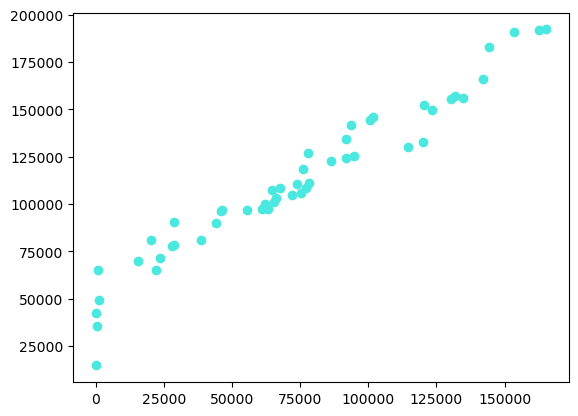

In [43]:
# Print the shape of dataset in the form of (#rows, #columns)
print(f"Rows , Columuns : {df.shape}")
print()

# Describe dataset's main statistics
# We're using the include="all" attribut because we want to see/explore all values (not only numbers)
# We need to see if there's missing values (null / NaN) and the type of data we have (numerical, categorical, labels, etc.)
print(df.describe(include="all"))
print()

# We print the sum of missing values by column
print(df.isnull().any())

# graph = sns.catplot(x="Marketing Spending", y="Profit", data=df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="#4BE8E0")
plt.show()

## Step 3 - Separate Target from feature variables

In [45]:
print("Separating labels from features...")

# We create two separate DataFrames, one with our features X and one for the target variable Y (that we want to predict)
# We're using a List to enumerate the columns that we're going to use as features X
features_list = ["Marketing Spending"]

X = df.loc[:,features_list]  # X = df[features_list]
y = df.loc[:,"Profit"] # Y = df["Profit"] 

print("...Done.")
print()

print(X.head())
print()
print(y.head())

Separating labels from features...
...Done.

   Marketing Spending
0           165349.20
1           162597.70
2           153441.51
3           144372.41
4           142107.34

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


## Step 4 - Train / Test split 

In [32]:
print("Splitting dataset into train set and test set...")

# The method will return 4 arrays : 2 with features X and 2 with target variables y (each time : 1 for training the model, 1 for testing it)
# X : our DataFrames of features
# y : our DataFrames of target variables
# test_size : the size of the training set compared with total set, using proportion => 0.20 (20%)
# random_state : the method we use to randomly selected our data
# stratify : allows to stratify your sample (same proportion of categories in test and train set) on a specific column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")  
print()
print(X_train.head())
print()                    
print(y_train.head())                    
print()                    

print(X_test.head())
print()                    
print(y_test.head())

Splitting dataset into train set and test set...
...Done.

    Marketing Spending
33            55493.95
35            46014.02
26            75328.87
34            46426.07
18            91749.16

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64

    Marketing Spending
28            66051.52
11           100671.96
10           101913.08
41            27892.92
2            153441.51

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64


## Step 5 - Training

In [9]:
print("--- Training pipeline ---")

--- Training pipeline ---


### Imputing missing values

In [ ]:
# No missing values

### Standardizing (scaling) and encoding

In [ ]:
print("Encoding categorical features and standardizing numerical features...")
print()

# We create a list with ids of columns containing numerical features in order to standardize them 
numeric_features = [0]
numeric_transformer = StandardScaler()

# Instansiate the class ColumnTransformer with our transformers (in this case : one for scaling, one for encoding)
feature_encoder = ColumnTransformer(
    transformers=[   
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print()
print(X_train) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

(40, 1)
...Done.

[[-0.35006454]
 [-0.55530319]
 [ 0.07935762]
 [-0.54638238]
 [ 0.43485371]
 [ 1.26943143]
 [ 1.04525007]
 [-1.529843  ]
 [-1.53976251]
 [-0.13115188]
 [ 0.92791613]
 [-0.20932933]
 [-0.17870828]
 [ 0.1374709 ]
 [-1.03967624]
 [ 0.09938348]
 [-1.21580174]
 [ 1.05822437]
 [ 0.4401196 ]
 [-0.15151937]
 [ 1.30361149]
 [ 0.49781135]
 [-0.92897212]
 [-1.55149779]
 [ 1.96871085]
 [ 0.48063418]
 [-0.59739193]
 [ 0.11649007]
 [ 1.36290079]
 [-0.08943162]
 [-0.93093295]
 [ 0.14561902]
 [ 0.31947194]
 [ 1.11867842]
 [-0.71671353]
 [-1.52301833]
 [ 1.57413686]
 [ 2.02828029]
 [-1.55149779]
 [-1.07135402]]



### Build and train the model

In [34]:
# Train model
print("Train model...")

regressor = LinearRegression()

# This steps is the actual training !
regressor.fit(X_train, y_train)

print("...Done.")

Train model...
...Done.


### Predict

In [35]:
# Predictions on training set
print("Predictions on training set...")

y_train_pred = regressor.predict(X_train)

print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 95676.21073667  87602.88620742 112568.08084243  87953.79738211
 126551.97418703]



## Step 6 - Testing

In [ ]:
print("--- Test pipeline ---")

### Imputing missing values

In [36]:
# No missing values

### Standardizing (scaling) and encoding

In [37]:
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test)
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")
print()
print(X_test)

Encoding categorical features and standardizing numerical features...

    Marketing Spending
28            66051.52
11           100671.96
10           101913.08
41            27892.92
2            153441.51
27            72107.60
38            20229.59
31            61136.38
22            73994.56
4            142107.34

...Done.

[[-0.1214952 ]
 [ 0.6280306 ]
 [ 0.65490061]
 [-0.94762148]
 [ 1.77048111]
 [ 0.00961775]
 [-1.11353109]
 [-0.22790703]
 [ 0.05047007]
 [ 1.52509853]]


### Predict

In [38]:
# Predictions on test set
print("Predictions on test set...")

y_test_pred = regressor.predict(X_test)

print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508]



## Step 7 - Evaluate your model

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

# R2 close to 1 => good performance
# R2 train +/- 5% R2 test => good performance
# If more :
# R2 train > R2 test => overfitting, impossible to generalize, need more data
# R2 train < R2 test => underfitting, not really a problem, maybe use a complex model
if(regressor.score(X_train, y_train) > regressor.score(X_test, y_test)) :
    print("R2 train > R2 test => overfitting")
else :
    print("R2 train < R2 test => underfitting")

--- Assessing the performances of the model ---
R2 score on training set :  0.9449589778363044
R2 score on test set :  0.9464587607787219
R2 train < R2 test => underfitting


## Step 9 - Feature importance

In [30]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [  592.38156517  -549.19065753   -43.19090764 25440.39203571]
Constant is:  78085.80951156281


In [31]:
X_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  1.        ,  0.        , -0.26257421],
       [ 0.        ,  1.        ,  0.        , -0.88858956],
       [ 0.        ,  1.        ,  0.        ,  1.2472275 ],
       [ 0.        ,  0.        ,  1.        , -0.18892535],
       [ 1.        ,  0.        ,  0.        , -0.55716967]])

In [ ]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [0]), ('num', StandardScaler(), [1])]
One Hot Encoder transformer is:  OneHotEncoder()


In [ ]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array(['France', 'Germany', 'United-Kingdom'], dtype=object)]


In [34]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['YearsExperience'], dtype='object')


In [35]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['France', 'Germany', 'United-Kingdom', 'YearsExperience'],
      dtype=object)

In [36]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,France,592.381565
1,Germany,-549.190658
2,United-Kingdom,-43.190908
3,YearsExperience,25440.392036


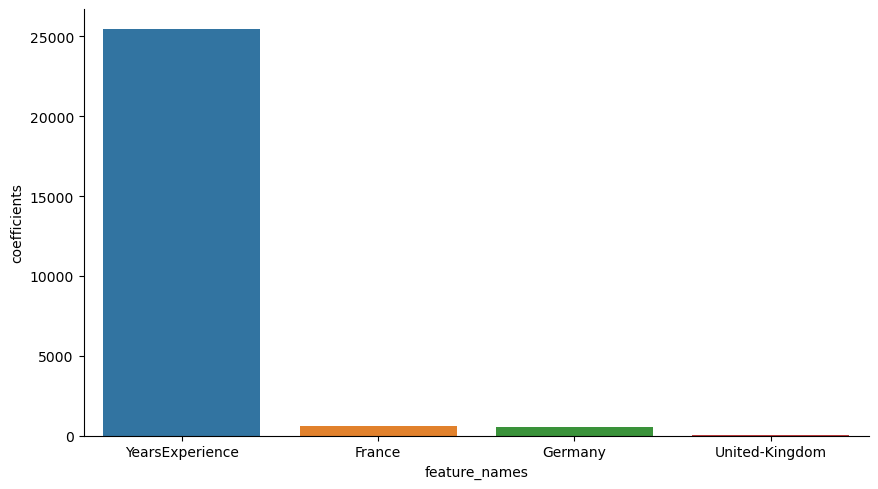

In [39]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9, # Resize graph
            hue='feature_names')